**Car Price Data Predictive Modeling <br> Lucky Wijaya Pengestu**

# Import Library & Read Dataset

In [1]:
#Import Library
import warnings
warnings.filterwarnings('ignore')

#DataFrame Library
import pandas as pd
import numpy as np

#Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns

#Modelin Library
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [2]:
#Visualization Plot Settings
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style('whitegrid')
sns.color_palette('viridis')
plt.style.use('seaborn-bright')

In [3]:
#Read DataFrame
df = pd.read_csv('CarPrice.csv')
pd.set_option('display.max_columns', None)
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
#Changing Column Name
df.rename(columns={'car_ID' : 'id', 'symboling' : 'symbol', 'CarName' : 'name', 'fueltype' : 'fuel', 'doornumber' : 'door', 
                   'carbody' : 'body', 'drivewheel' : 'wheel', 'enginelocation' : 'engineloc', 'carlength' : 'length', 
                   'carwidth' : 'width', 'carheight' : 'height', 'curbweight' : 'weight', 'enginetype' : 'engine', 
                   'cylindernumber' : 'cylinder', 'horsepower' : 'hp'}, inplace = True)

# Exploratory Data Analysis

In [5]:
#Checking DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                205 non-null    int64  
 1   symbol            205 non-null    int64  
 2   name              205 non-null    object 
 3   fuel              205 non-null    object 
 4   aspiration        205 non-null    object 
 5   door              205 non-null    object 
 6   body              205 non-null    object 
 7   wheel             205 non-null    object 
 8   engineloc         205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  length            205 non-null    float64
 11  width             205 non-null    float64
 12  height            205 non-null    float64
 13  weight            205 non-null    int64  
 14  engine            205 non-null    object 
 15  cylinder          205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

| Variable | Type | Definition |
| ----------- | ----------- | ----------- |
| id | Numeric | Unique car ID 
| symbol | Categorical | Assigned insurance risk rating (+3 is risky, -3 is safe)
| name | Categorical | Name of car company |
| fuel | Categorical | Car fuel type |
| aspiration | Categorical | Aspiration used in a car |
| door | Categorical | Number of doors |
| body | Categorical | Body of car |
| wheel | Categorical | Type of drive wheel |
| engineloc | Categorical | Location of car engine |
| wheelbase | Numeric | Wheelbase of car |
| length | Numeric | Length of car |
| width | Numeric | Width of car |
| height | Numeric | Height of car |
| weight | Numeric | Weight of a car without occupants or baggage |
| engine | Categorical | Type of engine |
| cylinder | Categorical | Cylinder number placed in the car |
| enginesize | Numeric | Size of car |
| fuelsystem | Categorical | Fuel system of car |
| boreratio | Numeric | Boreratio of car |
| stroke | Numeric | Stroke or volume inside the engine |
| compressionratio | Numeric | Compression ratio of car |
| hp | Numeric | Horsepower |
| peakrpm | Numeric | Car peak rpm |
| citympg | Numeric | Mileage in city |
| highwaympg | Numeric | Mileage on highway |
| price | Numeric | Price of car |

In [6]:
#Separating Columns based on Data Type
nums_type = ['int64', 'float64']
cats_type = ['object']

num_df = df.select_dtypes(include = nums_type)
nums = num_df.columns

cat_df = df.select_dtypes(include = cats_type)
cats = cat_df.columns

In [7]:
#Check Categorical Values
df[cats]

,name,fuel,aspiration,door,body,wheel,engineloc,engine,cylinder,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo 244dl,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo 246,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


## Numeric Approach

### Describe Data

In [8]:
#Sampling
df.sample(10)

,id,symbol,name,fuel,aspiration,door,body,wheel,engineloc,wheelbase,length,width,height,weight,engine,cylinder,enginesize,fuelsystem,boreratio,stroke,compressionratio,hp,peakrpm,citympg,highwaympg,price
136,137,3,saab 99gle,gas,turbo,two,hatchback,fwd,front,99.1,186.6,66.5,56.1,2808,dohc,four,121,mpfi,3.54,3.070,9.0,160,5500,19,26,18150.0
147,148,0,subaru tribeca,gas,std,four,wagon,fwd,front,97.0,173.5,65.4,53.0,2455,ohcf,four,108,mpfi,3.62,2.640,9.0,94,5200,25,31,10198.0
117,118,0,peugeot 604sl,gas,turbo,four,sedan,rwd,front,108.0,186.7,68.3,56.0,3130,l,four,134,mpfi,3.61,3.210,7.0,142,5600,18,24,18150.0
19,20,1,chevrolet monte carlo,gas,std,two,hatchback,fwd,front,94.5,155.9,63.6,52.0,1874,ohc,four,90,2bbl,3.03,3.110,9.6,70,5400,38,43,6295.0
43,44,0,isuzu MU-X,gas,std,four,sedan,rwd,front,94.3,170.7,61.8,53.5,2337,ohc,four,111,2bbl,3.31,3.230,8.5,78,4800,24,29,6785.0
125,126,3,porsche macan,gas,std,two,hatchback,rwd,front,94.5,168.9,68.3,50.2,2778,ohc,four,151,mpfi,3.94,3.110,9.5,143,5500,19,27,22018.0
56,57,3,mazda glc,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,3.33,3.255,9.4,101,6000,17,23,11845.0
116,117,0,peugeot 504,diesel,turbo,four,sedan,rwd,front,107.9,186.7,68.4,56.7,3252,l,four,152,idi,3.70,3.520,21.0,95,4150,28,33,17950.0
18,19,2,chevrolet impala,gas,std,two,hatchback,fwd,front,88.4,141.1,60.3,53.2,1488,l,three,61,2bbl,2.91,3.030,9.5,48,5100,47,53,5151.0
35,36,0,honda accord lx,gas,std,four,sedan,fwd,front,96.5,163.4,64.0,54.5,2010,ohc,four,92,1bbl,2.91,3.410,9.2,76,6000,30,34,7295.0


In [9]:
#Describe Categorical Values
df[cats].describe()

,name,fuel,aspiration,door,body,wheel,engineloc,engine,cylinder,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,peugeot 504,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [10]:
#Describe Numerical Values
df[nums].describe()

,id,symbol,wheelbase,length,width,height,weight,enginesize,boreratio,stroke,compressionratio,hp,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Visual Approach

### Univariate Analysis

#### Boxplot

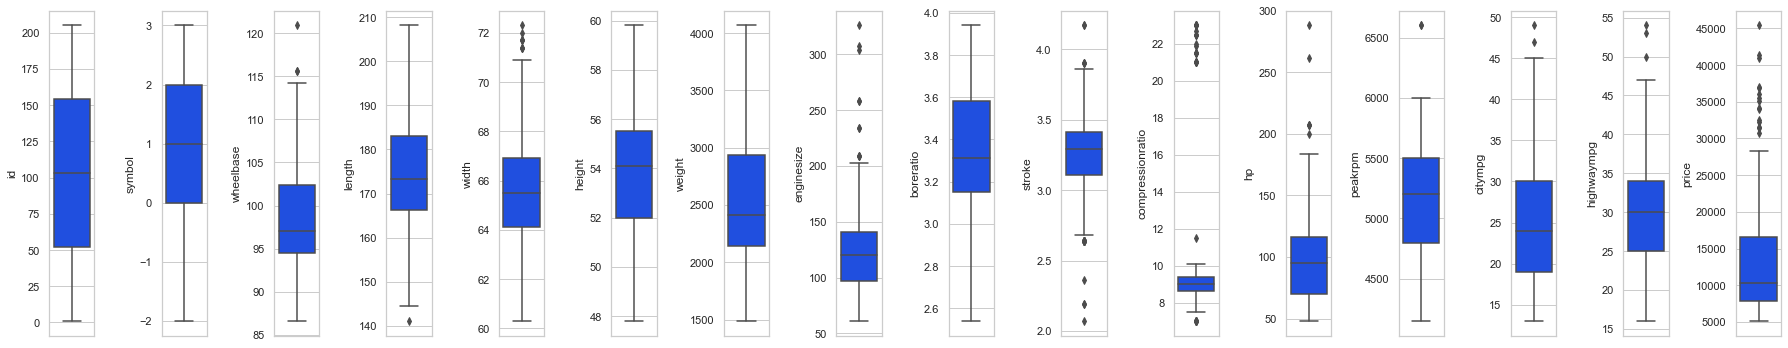

In [11]:
#Boxplot Visualization
plt.figure(figsize=(25, 5))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y = df[nums[i]], orient = 'v')
    plt.tight_layout()

There are outliers in `wheelbase`, `with`, `enginesize`, `stroke`, `compressionration`, `hp`, `peakrpm`, `highwaympg`, and `price`

#### KDEplot

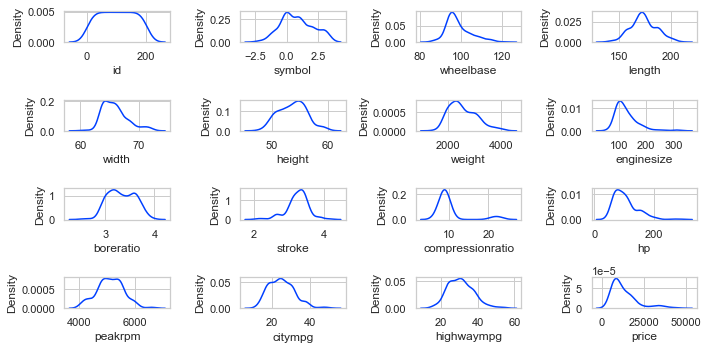

In [12]:
#KDEPlot Visualization
for i in range(0, len(nums)):
    plt.subplot(4,4, i+1)
    sns.kdeplot(data = df, x = df[nums[i]])
    plt.tight_layout()

Overall the features has normal distribution

#### Histplot 

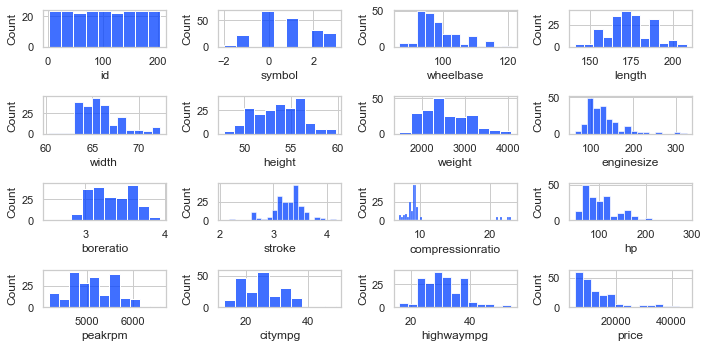

In [13]:
#Histlot Visualization
for i in range(0, len(nums)):
    plt.subplot(4,4, i+1)
    sns.histplot(df[nums[i]])
    plt.tight_layout()

#### Countplot

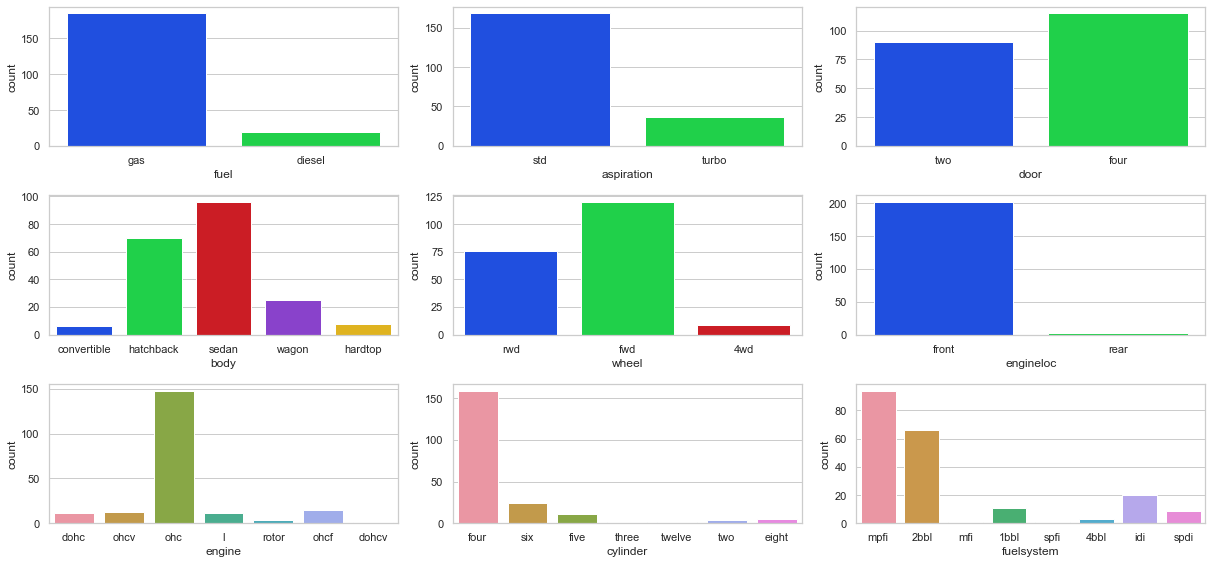

In [14]:
#Countplot Visualization
cat_vis = ['fuel', 'aspiration', 'door', 'body', 'wheel', 'engineloc', 'engine', 'cylinder', 'fuelsystem']
plt.figure(figsize = (17,8))
for i in range(0, len(cat_vis)):
    plt.subplot(3, 3, i+1)
    sns.countplot(df[cat_vis[i]], orient = 'v')
    plt.tight_layout()

Based on `fuel`, `door`, `body`, `wheel`, `engine`, `cylinder` features, majority is a city cars.

### Multivariate Analysis

#### Heatmap

<AxesSubplot:>

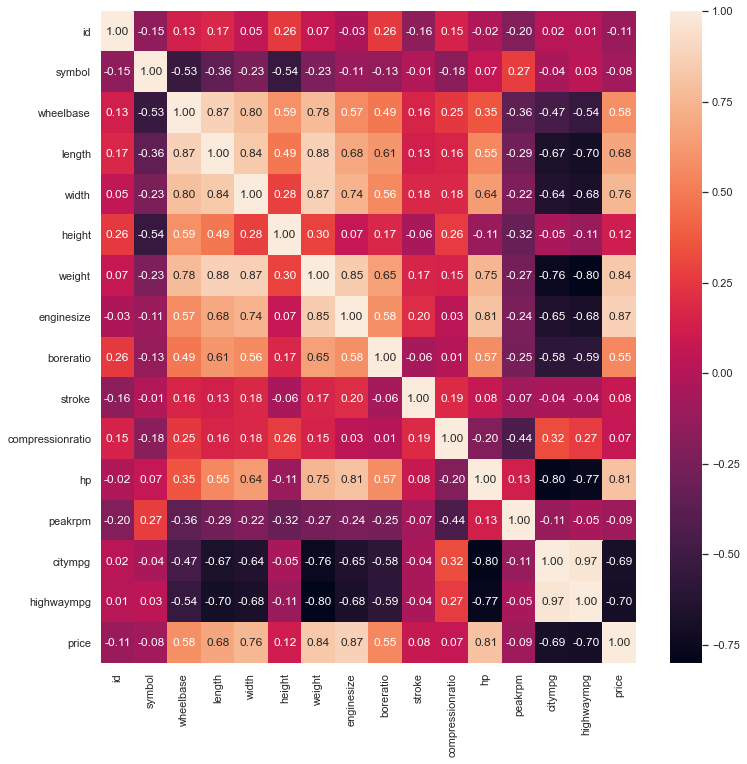

In [15]:
#Heatmap Visualization
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

Some of the columns potentially be a redundant features because have strong correlation value

#### Pairplot

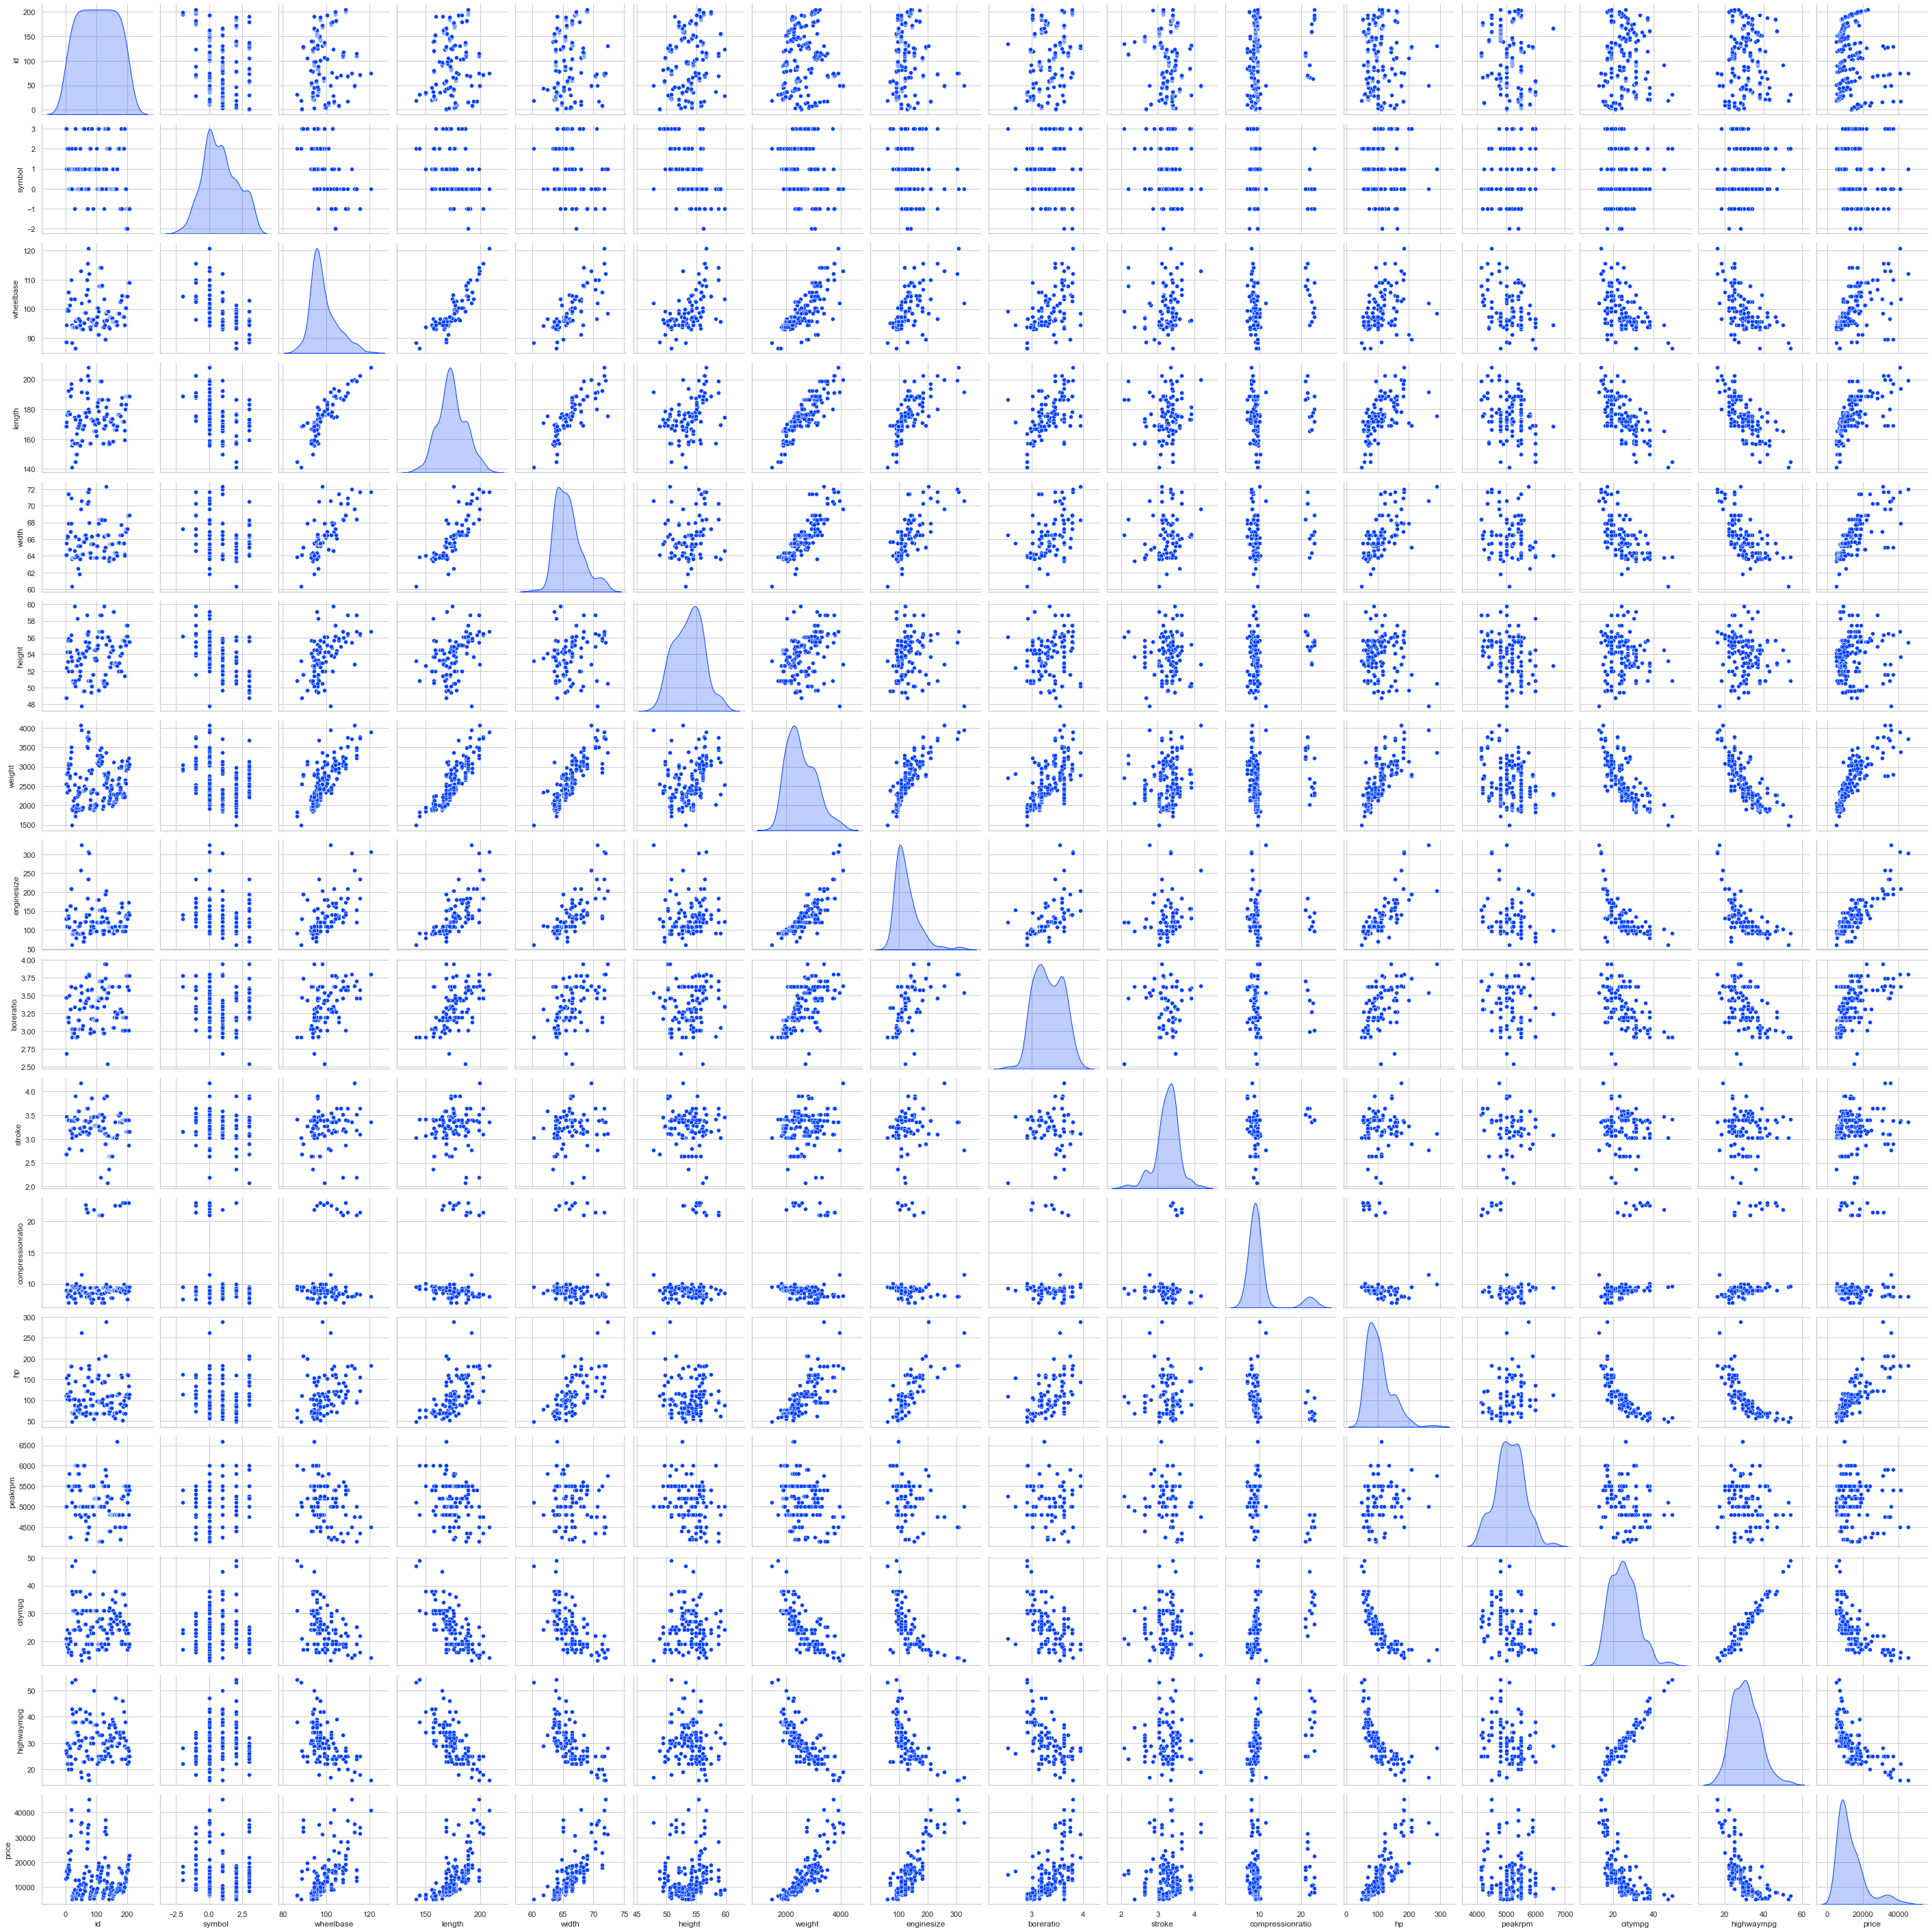

In [16]:
#Pairplot Visualization
sns.pairplot(df, diag_kind='kde')

# Data Processing

## dfori

In [17]:
#Copy df to dfori
dfori = df.copy()

### Missing Value

In [18]:
#Check Missing Value
dfori.isna().sum()

id                  0
symbol              0
name                0
fuel                0
aspiration          0
door                0
body                0
wheel               0
engineloc           0
wheelbase           0
length              0
width               0
height              0
weight              0
engine              0
cylinder            0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
hp                  0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

There are no missing value

### Duplicate Value

In [19]:
#Check Duplicate Value
dfori.duplicated().sum()

0

There are no duplicate value without subset

### Transformation

In [20]:
#Ordinal Encoding
ori_door = pd.Categorical(dfori['door'], categories = ['two', 'four'], ordered = True)
labels, unique = pd.factorize(ori_door, sort = True)

dfori['cylinder'] = dfori['cylinder'].replace({'two' : 2, 'three' : 3, 'four' : 4, 'five' : 5, 'six' : 6, 'eight' : 8, 'twelve' : 12})

#One Hot Encoding
ori_fuel = pd.get_dummies(dfori['fuel'], prefix = 'fuel')
ori_aspiration = pd.get_dummies(dfori['aspiration'], prefix = 'asp')
ori_body = pd.get_dummies(dfori['body'], prefix = 'body')
ori_wheel = pd.get_dummies(dfori['wheel'], prefix = 'wheel')
ori_engineloc = pd.get_dummies(dfori['engineloc'], prefix = 'engineloc')
ori_engine = pd.get_dummies(dfori['engine'], prefix = 'engine')
ori_fuelsystem = pd.get_dummies(dfori['fuelsystem'], prefix = 'fuelsystem')

#Concat Feature Encoding
dfori = pd.concat([dfori, ori_fuel], axis = 1)
dfori = pd.concat([dfori, ori_aspiration], axis = 1)
dfori = pd.concat([dfori, ori_body], axis = 1)
dfori = pd.concat([dfori, ori_wheel], axis = 1)
dfori = pd.concat([dfori, ori_engineloc], axis = 1)
dfori = pd.concat([dfori, ori_engine], axis = 1)
dfori = pd.concat([dfori, ori_fuelsystem], axis = 1)
dfori['door'] = labels

In [21]:
#Drop Categorical Features
dfori = dfori.drop(columns = ['id', 'name', 'fuel', 'aspiration', 'body', 'wheel', 'engineloc', 'engine', 'fuelsystem'])

In [22]:
#Check dfori
dfori

,symbol,door,wheelbase,length,width,height,weight,cylinder,enginesize,boreratio,stroke,compressionratio,hp,peakrpm,citympg,highwaympg,price,fuel_diesel,fuel_gas,asp_std,asp_turbo,body_convertible,body_hardtop,body_hatchback,body_sedan,body_wagon,wheel_4wd,wheel_fwd,wheel_rwd,engineloc_front,engineloc_rear,engine_dohc,engine_dohcv,engine_l,engine_ohc,engine_ohcf,engine_ohcv,engine_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,0,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,2,1,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,2,1,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1,109.1,188.8,68.9,55.5,2952,4,141,3.78,3.15,9.5,114,5400,23,28,16845.0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
201,-1,1,109.1,188.8,68.8,55.5,3049,4,141,3.78,3.15,8.7,160,5300,19,25,19045.0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
202,-1,1,109.1,188.8,68.9,55.5,3012,6,173,3.58,2.87,8.8,134,5500,18,23,21485.0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
203,-1,1,109.1,188.8,68.9,55.5,3217,6,145,3.01,3.40,23.0,106,4800,26,27,22470.0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [23]:
#check dfori info
dfori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 46 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symbol            205 non-null    int64  
 1   door              205 non-null    int64  
 2   wheelbase         205 non-null    float64
 3   length            205 non-null    float64
 4   width             205 non-null    float64
 5   height            205 non-null    float64
 6   weight            205 non-null    int64  
 7   cylinder          205 non-null    int64  
 8   enginesize        205 non-null    int64  
 9   boreratio         205 non-null    float64
 10  stroke            205 non-null    float64
 11  compressionratio  205 non-null    float64
 12  hp                205 non-null    int64  
 13  peakrpm           205 non-null    int64  
 14  citympg           205 non-null    int64  
 15  highwaympg        205 non-null    int64  
 16  price             205 non-null    float64
 1

### Normalization

In [24]:
#Grouping Numerical Features
ori_type = ['int64', 'float64', 'uint8']
num_dfori = dfori.select_dtypes(include = ori_type)
ori_nums = num_dfori.columns
print(ori_nums)

Index(['symbol', 'door', 'wheelbase', 'length', 'width', 'height', 'weight',
       'cylinder', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'hp', 'peakrpm', 'citympg', 'highwaympg', 'price', 'fuel_diesel',
       'fuel_gas', 'asp_std', 'asp_turbo', 'body_convertible', 'body_hardtop',
       'body_hatchback', 'body_sedan', 'body_wagon', 'wheel_4wd', 'wheel_fwd',
       'wheel_rwd', 'engineloc_front', 'engineloc_rear', 'engine_dohc',
       'engine_dohcv', 'engine_l', 'engine_ohc', 'engine_ohcf', 'engine_ohcv',
       'engine_rotor', 'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')


In [25]:
#Normalization Features
for i in range(len(ori_nums)):
    dfori[ori_nums[i]] = MinMaxScaler().fit_transform(dfori[ori_nums[i]].values.reshape(len(dfori), 1))

In [26]:
#Normalization Check
dfori.head()

,symbol,door,wheelbase,length,width,height,weight,cylinder,enginesize,boreratio,stroke,compressionratio,hp,peakrpm,citympg,highwaympg,price,fuel_diesel,fuel_gas,asp_std,asp_turbo,body_convertible,body_hardtop,body_hatchback,body_sedan,body_wagon,wheel_4wd,wheel_fwd,wheel_rwd,engineloc_front,engineloc_rear,engine_dohc,engine_dohcv,engine_l,engine_ohc,engine_ohcf,engine_ohcv,engine_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1.0,0.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.2,0.260377,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,0.207959,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.2,0.260377,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,0.282558,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.6,0.0,0.230321,0.449254,0.433333,0.383333,0.517843,0.4,0.343396,0.100000,0.666667,0.1250,0.441667,0.346939,0.166667,0.263158,0.282558,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.8,1.0,0.384840,0.529851,0.491667,0.541667,0.329325,0.2,0.181132,0.464286,0.633333,0.1875,0.225000,0.551020,0.305556,0.368421,0.219254,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.8,1.0,0.373178,0.529851,0.508333,0.541667,0.518231,0.3,0.283019,0.464286,0.633333,0.0625,0.279167,0.551020,0.138889,0.157895,0.306142,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## dflimit

In [27]:
#Copy df to dflimit
dflimit = df.copy()

### Outliers

In [28]:
#Replace Outliers with IQR limit
print('Rows before treatment', len(dflimit))

for col in ['wheelbase', 'length', 'width', 'enginesize', 'stroke', 'compressionratio', 'hp', 'peakrpm', 'citympg', 'highwaympg']:
    Q1 = dflimit[col].quantile(0.25)
    Q3 = dflimit[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)
    
    dflimit[col] = np.where(dflimit[col] > high_limit, high_limit, dflimit[col])
    dflimit[col] = np.where(dflimit[col] < low_limit, low_limit, dflimit[col])

print('Rows after treatment', len(dflimit))

Rows before treatment 205
Rows after treatment 205


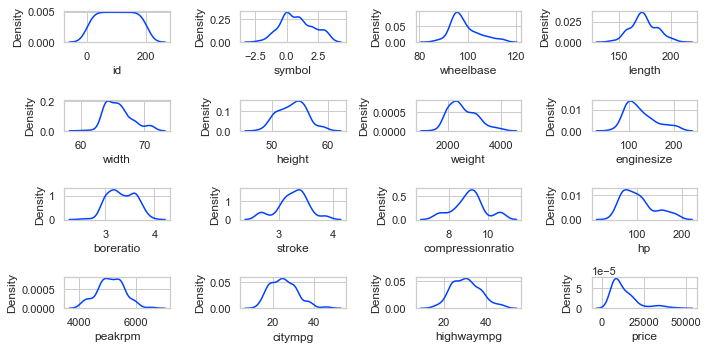

In [29]:
#KDEPlot Visualization After Outliers Treatment
for i in range(0, len(nums)):
    plt.subplot(4,4, i+1)
    sns.kdeplot(data = dflimit, x = dflimit[nums[i]])
    plt.tight_layout()

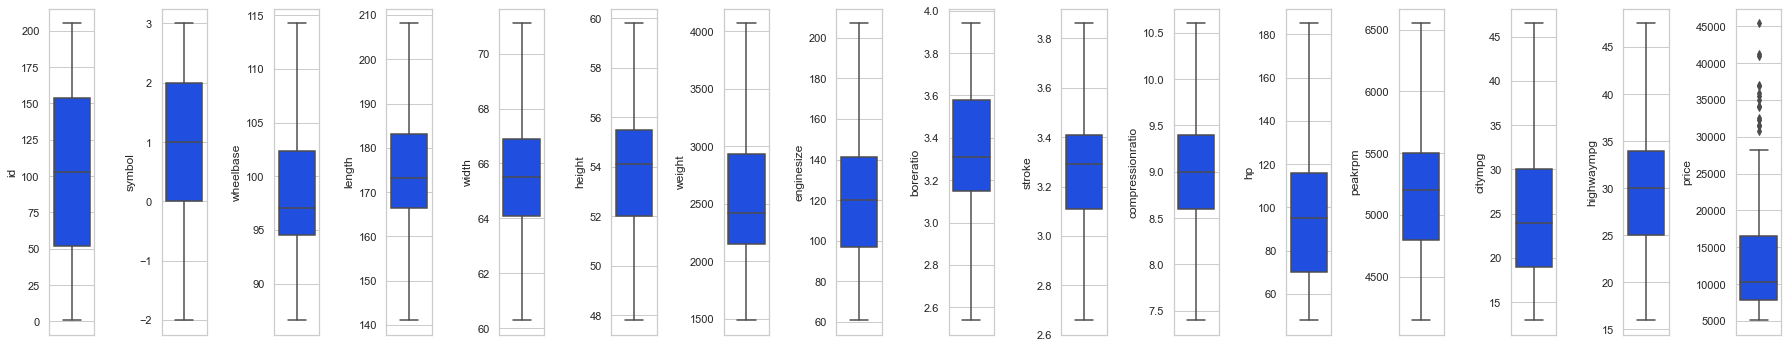

In [30]:
#Boxplot Visualization After Outliers Treatment
plt.figure(figsize=(25, 5))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y = dflimit[nums[i]], orient = 'v')
    plt.tight_layout()

### Transformation

In [31]:
#Ordinal Encoding
limit_door = pd.Categorical(dflimit['door'], categories = ['two', 'four'], ordered = True)
labels, unique = pd.factorize(limit_door, sort = True)

dflimit['cylinder'] = dflimit['cylinder'].replace({'two' : 2, 'three' : 3, 'four' : 4, 'five' : 5, 'six' : 6, 'eight' : 8, 'twelve' : 12})


#One Hot Encoding
limit_fuel = pd.get_dummies(dflimit['fuel'], prefix = 'fuel')
limit_aspiration = pd.get_dummies(dflimit['aspiration'], prefix = 'asp')
limit_body = pd.get_dummies(dflimit['body'], prefix = 'body')
limit_wheel = pd.get_dummies(dflimit['wheel'], prefix = 'wheel')
limit_engineloc = pd.get_dummies(dflimit['engineloc'], prefix = 'engineloc')
limit_engine = pd.get_dummies(dflimit['engine'], prefix = 'engine')
limit_fuelsystem = pd.get_dummies(dflimit['fuelsystem'], prefix = 'fuelsystem')

#Concat Feature Encoding
dflimit = pd.concat([dflimit, limit_fuel], axis = 1)
dflimit = pd.concat([dflimit, limit_aspiration], axis = 1)
dflimit = pd.concat([dflimit, limit_body], axis = 1)
dflimit = pd.concat([dflimit, limit_wheel], axis = 1)
dflimit = pd.concat([dflimit, limit_engineloc], axis = 1)
dflimit = pd.concat([dflimit, limit_engine], axis = 1)
dflimit = pd.concat([dflimit, limit_fuelsystem], axis = 1)
dflimit['door'] = labels

In [32]:
#Check dflimit
dflimit

,id,symbol,name,fuel,aspiration,door,body,wheel,engineloc,wheelbase,length,width,height,weight,engine,cylinder,enginesize,fuelsystem,boreratio,stroke,compressionratio,hp,peakrpm,citympg,highwaympg,price,fuel_diesel,fuel_gas,asp_std,asp_turbo,body_convertible,body_hardtop,body_hatchback,body_sedan,body_wagon,wheel_4wd,wheel_fwd,wheel_rwd,engineloc_front,engineloc_rear,engine_dohc,engine_dohcv,engine_l,engine_ohc,engine_ohcf,engine_ohcv,engine_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,alfa-romero giulia,gas,std,0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,3,alfa-romero stelvio,gas,std,0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,1,alfa-romero Quadrifoglio,gas,std,0,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,4,2,audi 100 ls,gas,std,1,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,5,2,audi 100ls,gas,std,1,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,1,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,4,141.0,mpfi,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
201,202,-1,volvo 144ea,gas,turbo,1,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,4,141.0,mpfi,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
202,203,-1,volvo 244dl,gas,std,1,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,6,173.0,mpfi,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
203,204,-1,volvo 246,diesel,turbo,1,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,6,145.0,idi,3.01,3.40,10.6,106.0,4800.0,26.0,27.0,22470.0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


### Normalization

In [33]:
#Grouping Numerical Features
limit_type = ['int64', 'float64', 'uint8']
num_dflimit = dflimit.select_dtypes(include = limit_type)
limit_nums = num_dflimit.columns
print(limit_nums)

Index(['id', 'symbol', 'door', 'wheelbase', 'length', 'width', 'height',
       'weight', 'cylinder', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'hp', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'fuel_diesel', 'fuel_gas', 'asp_std', 'asp_turbo', 'body_convertible',
       'body_hardtop', 'body_hatchback', 'body_sedan', 'body_wagon',
       'wheel_4wd', 'wheel_fwd', 'wheel_rwd', 'engineloc_front',
       'engineloc_rear', 'engine_dohc', 'engine_dohcv', 'engine_l',
       'engine_ohc', 'engine_ohcf', 'engine_ohcv', 'engine_rotor',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')


In [34]:
#Normalization Features
for i in range(len(limit_nums)):
    dflimit[limit_nums[i]] = MinMaxScaler().fit_transform(dflimit[limit_nums[i]].values.reshape(len(dflimit), 1))

In [35]:
#Normalization Check
dflimit.head()

,id,symbol,name,fuel,aspiration,door,body,wheel,engineloc,wheelbase,length,width,height,weight,engine,cylinder,enginesize,fuelsystem,boreratio,stroke,compressionratio,hp,peakrpm,citympg,highwaympg,price,fuel_diesel,fuel_gas,asp_std,asp_turbo,body_convertible,body_hardtop,body_hatchback,body_sedan,body_wagon,wheel_4wd,wheel_fwd,wheel_rwd,engineloc_front,engineloc_rear,engine_dohc,engine_dohcv,engine_l,engine_ohc,engine_ohcf,engine_ohcv,engine_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0.000000,1.0,alfa-romero giulia,gas,std,0.0,convertible,rwd,front,0.072333,0.413433,0.351852,0.083333,0.411171,dohc,0.2,0.472603,mpfi,0.664286,0.016667,0.5000,0.459854,0.354167,0.238806,0.349206,0.207959,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.004902,1.0,alfa-romero stelvio,gas,std,0.0,convertible,rwd,front,0.072333,0.413433,0.351852,0.083333,0.411171,dohc,0.2,0.472603,mpfi,0.664286,0.016667,0.5000,0.459854,0.354167,0.238806,0.349206,0.282558,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.009804,0.6,alfa-romero Quadrifoglio,gas,std,0.0,hatchback,rwd,front,0.285714,0.449254,0.481481,0.383333,0.517843,ohcv,0.4,0.623288,mpfi,0.100000,0.675000,0.5000,0.773723,0.354167,0.179104,0.317460,0.282558,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.014706,0.8,audi 100 ls,gas,std,1.0,sedan,fwd,front,0.477396,0.529851,0.546296,0.541667,0.329325,ohc,0.2,0.328767,mpfi,0.464286,0.616667,0.8125,0.394161,0.562500,0.328358,0.444444,0.219254,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.019608,0.8,audi 100ls,gas,std,1.0,sedan,4wd,front,0.462929,0.529851,0.564815,0.541667,0.518231,ohc,0.3,0.513699,mpfi,0.464286,0.616667,0.1875,0.489051,0.562500,0.149254,0.190476,0.306142,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [36]:
#Drop Categorical Features
dflimit = dflimit.drop(columns = ['id', 'name', 'fuel', 'aspiration', 'body', 'wheel', 'engineloc', 'engine', 'fuelsystem'])

# Modeling

In [37]:
#Model Evaluation
def evaluation(model, prediction, xtrain, ytrain, xtest, ytest):
    print('MAE : %.2f' % mean_absolute_error(ytest, prediction)) # MAE
    print('RMSE : %.2f' % mean_squared_error(ytest, prediction, squared=False)) # RMSE
    print('R2 score : %.2f' % r2_score(ytest, prediction)) # R2 score
    print('Train Accuracy :', model.score(xtrain, ytrain)) # Train Accuracy
    print('Test Accuracy :', model.score(xtest, ytest)) # Test Accuracy

In [38]:
#Best Hyperparameter Evaluation
def best_hyperparameter(model, parameters):
    for key, value in parameters.items() :
        print('Best '+ key +':', model.get_params()[key])

In [39]:
#Best Feature Importance Evaluation
def feature_importance(model, x):
    feat_importances = pd.Series(model.best_estimator_.feature_importances_, index = x.columns)
    ax = feat_importances.nlargest(10).plot(kind = 'barh', figsize = (10, 8))
    ax.invert_yaxis()
    
    plt.xlabel('Score')
    plt.ylabel('Feature')
    plt.title('Feature Importance Score')

## Model 1 - dfori

In [40]:
#Separating Target & Features
x1 = dfori.drop(columns = ['price']) #Features
y1 = dfori['price'] #Target

In [41]:
#Splitting Train & Test 
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x1, y1, test_size = 0.3, random_state = 42)

In [42]:
#Modeling
models = {
    "LinearRegression" : LinearRegression(),
    "DecisionTree"     : DecisionTreeRegressor(),
    "RandomForest"     : RandomForestRegressor(),
    "SVR"              : SVR()
}

for model_name, model in models.items():
    model.fit(xtrain1, ytrain1)
    prediction1 = model.predict(xtest1)
    print("Model: {}".format(model_name))
    print(evaluation(model, prediction1, xtrain1, ytrain1, xtest1, ytest1), "\n")

Model: LinearRegression
MAE : 0.05
RMSE : 0.08
R2 score : 0.84
Train Accuracy : 0.9425993768879202
Test Accuracy : 0.8405973941545943
None 

Model: DecisionTree
MAE : 0.05
RMSE : 0.07
R2 score : 0.87
Train Accuracy : 0.9985524829197424
Test Accuracy : 0.8722724590045304
None 

Model: RandomForest
MAE : 0.03
RMSE : 0.05
R2 score : 0.94
Train Accuracy : 0.9861843254313791
Test Accuracy : 0.9416804367863009
None 

Model: SVR
MAE : 0.07
RMSE : 0.09
R2 score : 0.80
Train Accuracy : 0.8794565816903983
Test Accuracy : 0.802635549320928
None 



### Tuning Hyperparameter RandomForest

In [43]:
#List Hyperparameters
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 50, stop = 100, num = 10)], #Subtree
                       criterion = ['mse','mae'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 5)],  #Maximum depth tree
                       n_jobs = [3], 
                      )

#Initiation
RF1 = RandomForestRegressor(random_state = 42)
RF_tuned1 = RandomizedSearchCV(RF1, hyperparameters, cv=5, random_state=42, scoring='r2')
RF_tuned1.fit(xtrain1, ytrain1)

# Predict & Evaluation
prediction1 = RF_tuned1.predict(xtest1)
evaluation(model, prediction1, xtrain1, ytrain1, xtest1, ytest1)

MAE : 0.03
RMSE : 0.05
R2 score : 0.94
Train Accuracy : 0.8794565816903983
Test Accuracy : 0.802635549320928


In [44]:
#Check Best Hyperparameter
best_hyperparameter(RF_tuned1.best_estimator_, hyperparameters)

Best n_estimators: 77
Best criterion: mse
Best max_depth: 110
Best n_jobs: 3


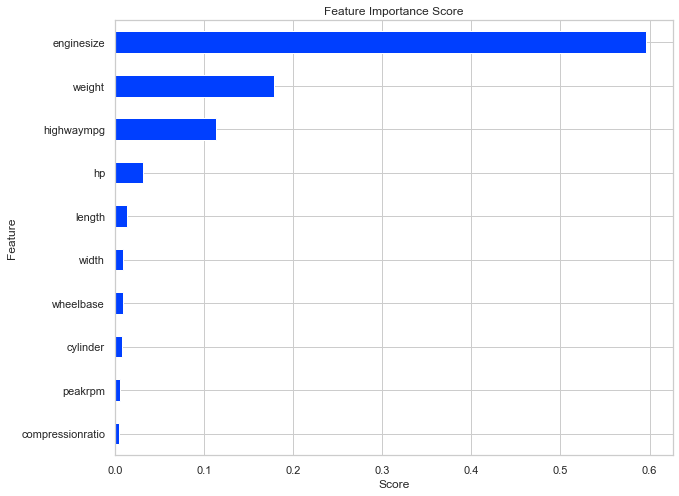

In [45]:
#Check Feature Importance
feature_importance(RF_tuned1, x1)

## Model 2- dflimit

In [46]:
#Separating Target & Features
x2 = dflimit.drop(columns = ['price']) #Features
y2 = dflimit['price'] #Target

In [47]:
#Splitting Train & Test 
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(x2, y2, test_size = 0.3, random_state = 42)

In [48]:
#Modeling
models = {
    "LinearRegression" : LinearRegression(),
    "DecisionTree"     : DecisionTreeRegressor(),
    "RandomForest"     : RandomForestRegressor(),
    "SVR"              : SVR()
}

for model_name, model in models.items():
    model.fit(xtrain2, ytrain2)
    prediction2 = model.predict(xtest2)
    print("Model: {}".format(model_name))
    print(evaluation(model, prediction2, xtrain2, ytrain2, xtest2, ytest2), "\n")

Model: LinearRegression
MAE : 0.06
RMSE : 0.09
R2 score : 0.80
Train Accuracy : 0.9330144128977595
Test Accuracy : 0.801751618398761
None 

Model: DecisionTree
MAE : 0.05
RMSE : 0.07
R2 score : 0.88
Train Accuracy : 0.9985524829197424
Test Accuracy : 0.878124622231927
None 

Model: RandomForest
MAE : 0.03
RMSE : 0.05
R2 score : 0.94
Train Accuracy : 0.9861846236106027
Test Accuracy : 0.9421217437935148
None 

Model: SVR
MAE : 0.07
RMSE : 0.09
R2 score : 0.82
Train Accuracy : 0.8798919701749369
Test Accuracy : 0.8220499993986722
None 



### Tuning Hyperparameter RandomForest

In [49]:
#List Hyperparameters
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 50, stop = 100, num = 10)], #Subtree 
                       criterion = ['mse','mae'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 5)],  # Maximum depth tree
                       n_jobs = [3], 
                      )

#Initiation
RF = RandomForestRegressor(random_state = 42)
RF_tuned2 = RandomizedSearchCV(RF, hyperparameters, cv=5, random_state=42, scoring='r2')
RF_tuned2.fit(xtrain2, ytrain2)

# Predict & Evaluation
prediction2 = RF_tuned2.predict(xtest2)
evaluation(model, prediction2, xtrain2, ytrain2, xtest2, ytest2)

MAE : 0.04
RMSE : 0.05
R2 score : 0.94
Train Accuracy : 0.8798919701749369
Test Accuracy : 0.8220499993986722


In [50]:
#Check Best Hyperparameter
best_hyperparameter(RF_tuned2.best_estimator_, hyperparameters)

Best n_estimators: 66
Best criterion: mae
Best max_depth: 85
Best n_jobs: 3


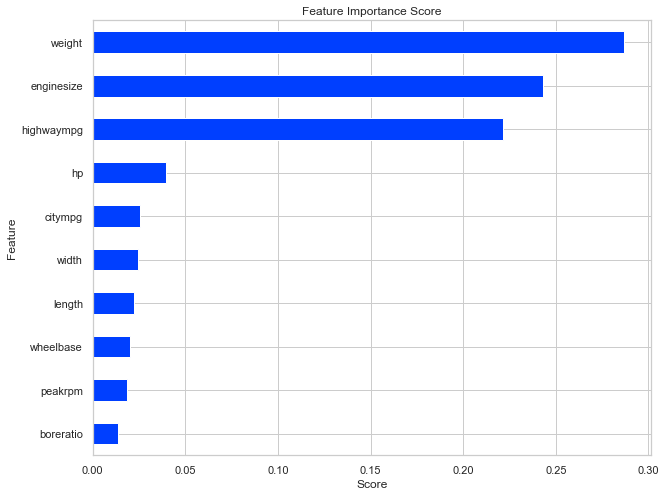

In [51]:
#Check Feature Importance
feature_importance(RF_tuned2, x2)

# Conclusion

Based on predictive modeling, Random Forest algorithm with dflimit has the best score compared to the other algorithms. <br> 
Random Forest make a prediction with MAE Score 0.03, RMSE Score 0.05, and R2 Score 0.95. <br> 
The algorithm is fit based on the train & test accuracy score 0.98 - 0.94). <br><br>

Model: RandomForest<br>
MAE : 0.03<br>
RMSE : 0.05<br>
R2 score : 0.95<br>
Train Accuracy : 0.9870657309672368<br>
Test Accuracy : 0.9463642946771321<br>